In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

The Bhattacharyya distance is a measure of similitude between two distributions. It is based on the Bhattacharyya coefficient which is a measure of the amount of overlap between two samples or populations.

In [2]:
np.random.seed(0)

In [3]:
mean_1 = np.array([2, 4])
cov_1 = np.array([[2, 2], [2, 5]])
sample_1 = np.random.multivariate_normal(mean_1, cov_1, 100)

mean_2 = np.array([4, 5])
cov_2 = np.array([[1, -1], [-1, 4]])
sample_2 = np.random.multivariate_normal(mean_2, cov_2, 100)

mean_3 = np.array([1, 9])
cov_3 = np.array([[1, 1.3], [1.3, 2]])
sample_3 = np.random.multivariate_normal(mean_3, cov_3, 100)

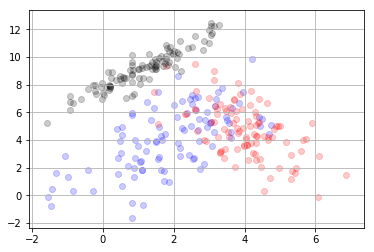

In [4]:
fig, ax = plt.subplots()
ax.scatter(sample_1[:, 0], sample_1[:, 1], color = 'b', alpha = 0.2)
ax.scatter(sample_2[:, 0], sample_2[:, 1], color = 'r', alpha = 0.2)
ax.scatter(sample_3[:, 0], sample_3[:, 1], color = 'k', alpha = 0.2)
plt.grid(True)

In the case of normally distributed multivariate data, like in our example, we can easily calculate this distance based on the mean vectors and the covariance matrices:

In [5]:
def bhattacharyya_normal(mean_1, mean_2, cov_1, cov_2):
    cov = (cov_1 + cov_2) / 2
    dif = mean_1 - mean_2
    return 1/8 * np.dot(np.dot(dif.T, np.linalg.inv(cov)), dif) + \
           0.5 * math.log(np.linalg.det(cov) / \
                          math.sqrt(np.linalg.det(cov_1) * \
                                    np.linalg.det(cov_2)))

print('Bhattacharyya distance between distributions 1 and 2: ' + \
      str(bhattacharyya_normal(mean_1, mean_2, cov_1, cov_2)))
print('Bhattacharyya distance between distributions 1 and 3: ' + \
      str(bhattacharyya_normal(mean_1, mean_3, cov_1, cov_3)))
print('Bhattacharyya distance between distributions 2 and 3: ' + \
      str(bhattacharyya_normal(mean_3, mean_2, cov_3, cov_2)))

Bhattacharyya distance between distributions 1 and 2: 0.549846610515216
Bhattacharyya distance between distributions 1 and 3: 3.1521903040348582
Bhattacharyya distance between distributions 2 and 3: 2.5200238950796394


However, no matter which distributions are involved, we could always use the general Bhattacharyya distance expression based on the Bhattacharyya coefficient. This requires to discretise the input space if we are dealing with continuous distributions, as in our case:

In [6]:
discrete = np.arange(-20, 20, 0.1)

def bhattacharyya_pdf(mean_1, mean_2, cov_1, cov_2):
    dist_1 = multivariate_normal(mean = mean_1, cov = cov_1)
    dist_2 = multivariate_normal(mean = mean_2, cov = cov_2)
    x, y = np.meshgrid(discrete, discrete)
    bc = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):

            bc = bc + math.sqrt(dist_1.pdf([x[i, j], y[i, j]]) / 100.0 * \
                                dist_2.pdf([x[i, j], y[i, j]]) / 100.0)

    return -math.log(bc)

print('Bhattacharyya distance between distributions 1 and 2: ' + \
      str(bhattacharyya_normal(mean_1, mean_2, cov_1, cov_2)))
print('Bhattacharyya distance between distributions 1 and 3: ' + \
      str(bhattacharyya_normal(mean_1, mean_3, cov_1, cov_3)))
print('Bhattacharyya distance between distributions 2 and 3: ' + \
      str(bhattacharyya_normal(mean_3, mean_2, cov_3, cov_2)))

Bhattacharyya distance between distributions 1 and 2: 0.549846610515216
Bhattacharyya distance between distributions 1 and 3: 3.1521903040348582
Bhattacharyya distance between distributions 2 and 3: 2.5200238950796394
